In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tetrahedron_dataset = pd.read_csv('/home/sei/tetrahedron_pair_ML/data/processed/train/train_data.csv')

### Dataset Structure:

In [2]:
tetrahedron_dataset.head()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
0,0.091586,0.052594,0.620746,0.898415,0.335147,0.877088,0.559328,0.260329,0.321830,0.113183,...,0.232344,0.350980,0.088775,0.095721,0.848711,0.522343,0.723183,0.102499,0.000988,1.0
1,0.691704,0.170270,0.307821,0.112297,0.526423,0.861719,0.428994,0.679398,0.368971,0.580101,...,0.359135,0.029642,0.431895,0.997937,0.042234,0.145956,0.348723,0.471403,0.000000,0.0
2,0.867235,0.629507,0.386814,0.215572,0.933512,0.224009,0.679292,0.455733,0.396382,0.135047,...,0.981933,0.417196,0.351231,0.775179,0.801100,0.898873,0.813919,0.630084,0.000000,0.0
3,0.330196,0.696555,0.443047,0.314557,0.956771,0.436255,0.139935,0.894962,0.124165,0.787804,...,0.432578,0.948001,0.143046,0.070101,0.826292,0.949088,0.009069,0.310350,0.000000,0.0
4,0.608128,0.770486,0.257726,0.624268,0.985649,0.847736,0.786333,0.639499,0.613900,0.153167,...,0.146917,0.983933,0.580874,0.493030,0.379225,0.790670,0.653276,0.261940,0.000000,0.0


- **Tetrahedrons:**
  - Each entry includes two tetrahedrons.
  - Each tetrahedron has four vertices.
  - Each vertex is defined by three coordinates (x, y, z).

- **Features:**
  - There are 12 features per tetrahedron, leading to 24 features total.
  - Column names follow the pattern `Tₜ_Vᵥ_α`, where:
    - `ₜ` = Tetrahedron number (1 or 2)
    - `ᵥ` = Vertex number (1 to 4)
    - `α` = Coordinate axis (x, y, or z)
  - Coordinates are normalized between 0 and 1.
  - Each coordinate is randomly generated through a i.i.d process.

- **Output Variables:**
  - **Intersection Status:**
    - Stored in the "intersection_status" column.
    - Values: `0` (no intersection) or `1` (intersection).
  - **Intersection Volume:**
    - Stored in the "intersection_volume" column.
    - Value is a non-negative real number.

### Input and Output Spaces:

- **Input Space:**
  - Represented as a vector in $\mathbb{R}^{24}$, where each coordinate is within the range $[0, 1]$.

- **Output Space:**
  - $\{0, 1\}$ for "HasIntersection".
  - $\mathbb{R}^{\geq 0}$ for "IntersectionVolume"

### Statistics


In [3]:
tetrahedron_dataset.describe()

,T1_v1_x,T1_v1_y,T1_v1_z,T1_v2_x,T1_v2_y,T1_v2_z,T1_v3_x,T1_v3_y,T1_v3_z,T1_v4_x,...,T2_v2_y,T2_v2_z,T2_v3_x,T2_v3_y,T2_v3_z,T2_v4_x,T2_v4_y,T2_v4_z,IntersectionVolume,HasIntersection
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,0.500577,0.500200,0.498334,0.505126,0.500082,0.502460,0.501273,0.497199,0.501597,0.503025,...,0.498735,0.500220,0.496428,0.500354,0.501515,0.499554,0.495888,0.502759,2.500002e-03,0.500000
std,0.291701,0.292649,0.294201,0.291444,0.292699,0.291900,0.293145,0.293096,0.291902,0.291076,...,0.292271,0.293880,0.293296,0.293615,0.291951,0.293482,0.291366,0.291332,3.227669e-03,0.500025
min,0.000126,0.000016,0.000218,0.000041,0.000132,0.000013,0.000159,0.000169,0.000022,0.000144,...,0.000080,0.000125,0.000114,0.000011,0.000019,0.000020,0.000221,0.000052,0.000000e+00,0.000000
25%,0.244988,0.242358,0.238384,0.251968,0.241655,0.248840,0.243500,0.237748,0.245204,0.246541,...,0.239391,0.241544,0.235383,0.243231,0.246561,0.239856,0.238076,0.249125,0.000000e+00,0.000000
50%,0.501271,0.504236,0.497321,0.504172,0.503072,0.502789,0.501958,0.496457,0.500210,0.502972,...,0.499190,0.500439,0.492290,0.503198,0.502935,0.502029,0.492425,0.504796,2.574500e-13,0.500000
75%,0.757547,0.754080,0.759049,0.763595,0.754715,0.758665,0.756993,0.757304,0.758330,0.755725,...,0.753979,0.758579,0.758883,0.760125,0.756320,0.754019,0.749848,0.758750,4.999501e-03,1.000000
max,0.999935,0.999994,0.999726,0.999803,0.999934,0.999914,0.999947,0.999994,0.999807,0.999924,...,1.000000,0.999816,0.999967,0.999951,0.999878,0.999988,0.999916,0.999889,9.998617e-03,1.000000


#### Class Balance

In [4]:
total_entries = len(tetrahedron_dataset)
status_0_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 0].shape[0]
status_1_count = tetrahedron_dataset[tetrahedron_dataset['HasIntersection'] == 1].shape[0]

percentage_status_0 = (status_0_count / total_entries) * 100
percentage_status_1 = (status_1_count / total_entries) * 100

print(f"Percentage of entries with HasIntersection = 0: {percentage_status_0:.2f}%")
print(f"Percentage of entries with HasIntersection = 1: {percentage_status_1:.2f}%")

Percentage of entries with HasIntersection = 0: 50.00%
Percentage of entries with HasIntersection = 1: 50.00%


#### Coordinates distribution

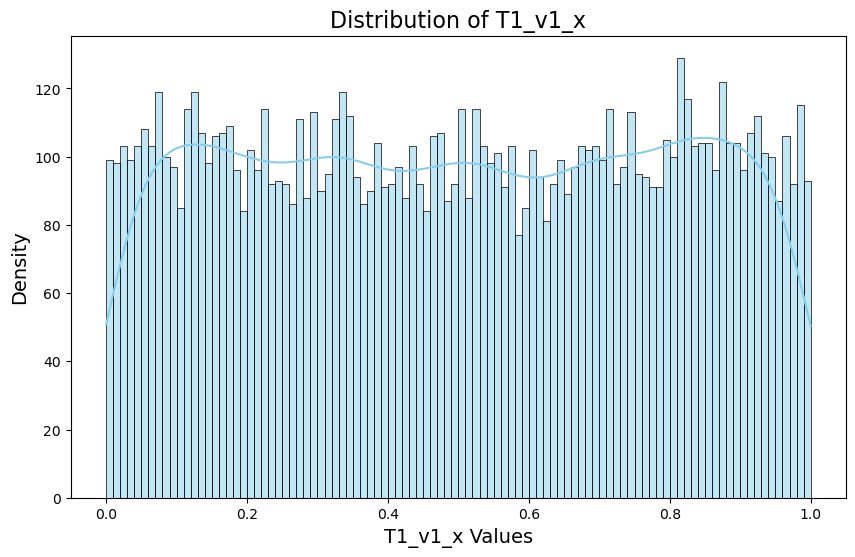

In [5]:
# Plotting the distribution of 'T1_v1_x' (Tₜ_Vᵥ_α, will have similar distributions)
plt.figure(figsize=(10, 6))
sns.histplot(tetrahedron_dataset['T1_v1_x'], kde=True, bins=100, color='skyblue')
plt.title('Distribution of T1_v1_x', fontsize=16)
plt.xlabel('T1_v1_x Values', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

#### Coordinates precision

In [6]:
# Extract all coordinate columns
coordinate_columns = [col for col in tetrahedron_dataset.columns if '_v' in col]

def calculate_precision(value):
    value_str = str(value)
    if '.' in value_str:
        return len(value_str.split('.')[1])
    else:
        return 0

max_precision = 0

for col in coordinate_columns:
    col_precision = tetrahedron_dataset[col].map(calculate_precision)
    max_precision = max(max_precision, col_precision.max())

print(f"Max coordinate precision in the dataset: {max_precision} decimal places")

Max coordinate precision in the dataset: 16 decimal places


#### Volume distribution

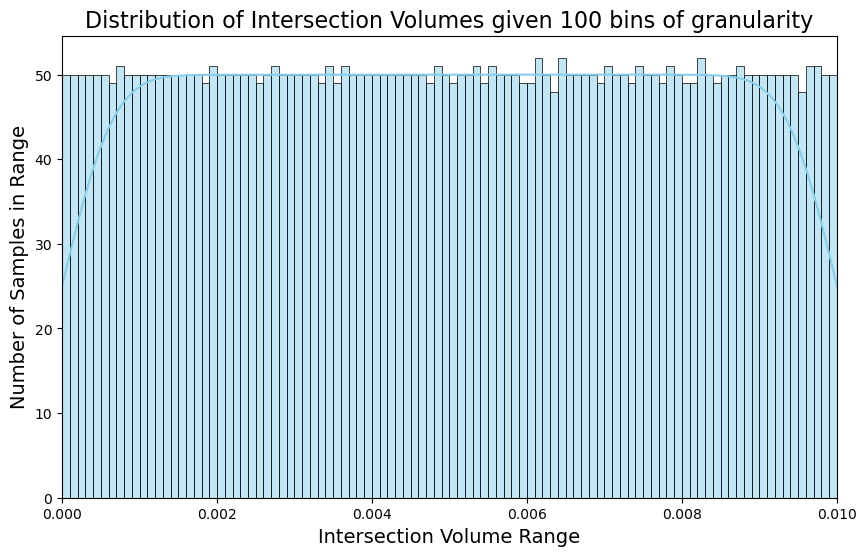

In [7]:
intersecting_cases = tetrahedron_dataset[tetrahedron_dataset['IntersectionVolume'] > 0]
bins = 100
plt.figure(figsize=(10, 6))
sns.histplot(intersecting_cases['IntersectionVolume'], kde=True, bins=bins, color='skyblue', alpha=0.5)
plt.title(f'Distribution of Intersection Volumes given {bins} bins of granularity', fontsize=16)
plt.xlabel('Intersection Volume Range', fontsize=14)
plt.ylabel('Number of Samples in Range', fontsize=14)
plt.xlim(0, 0.01)
plt.show()